In [4]:
import pandas as pd
import numpy as np
import matplotlib
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\82102\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_0         155 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    libxgboost-1.5.0           |       hd77b12b_1         2.3 MB  anaconda
    py-xgboost-1.5.0           |   py39haa95532_1         166 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         anaconda/win-64::libxgboost-1.5.0-hd77b12b_1
  py-xgboost    



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [19]:
conda install -c conda-forge lightgbm

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... 
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_0
  - defaults/win-64::certifi-2021.10.8-py39haa95532_0done

## Package Plan ##

  environment location: C:\Users\82102\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------

    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    lightgbm-3.3.2             |   py39h415ef7b_0         901 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.3.2-py39h415ef7b_0
  python_abi         conda-forge/win-64::pyth

In [8]:
travel=pd.read_csv('C:/Users/82102/Desktop/문화 관광 project/문화관광 프로젝트 R/국민여행조사설문통합데이터(여행자최종tour_cl).csv', encoding='cp949',low_memory=False)

In [58]:
import xgboost as xgb
from xgboost import plot_importance
import os
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

dataset=travel
X=dataset.loc[:,['여행활동', '계절', 'A4_1','tour_cluster']]
y=dataset.loc[:,'A10']

In [57]:
travel.columns

Index(['ID', '여행경험여부', 'when_travel', 'travel_day', 'travel_cost', 'sleep_1',
       'sleep_2', 'sleep_3', 'A1_1', 'A1_2', 'A1_3', 'A4_1', 'A4_2', 'A4_3',
       'A7', 'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'B9_1', 'B9_2', 'B9_3', 'DQ6A', 'DQ6B', 'BSEX', 'BAGE', 'year',
       '방문지역_시군구', '방문지역_시도', '거주지', '근교여행여부', '계절', '여행방문순서', '여행활동',
       'tour_cluster'],
      dtype='object')

In [31]:
for i in range(2):
    if X[X.columns[i]].dtype == 'int64':
           X[X.columns[i]] = X[X.columns[i]].astype('int32')
    elif X[X.columns[i]].dtype == 'object':
           X[X.columns[i]] = X[X.columns[i]].astype('category')
    elif X[X.columns[i]].dtype == 'float64':
           X[X.columns[i]] = X[X.columns[i]].astype('float32')

In [59]:
X.loc[:,'A4_1']=X.loc[:,'A4_1'].astype('category')
X.loc[:,'여행활동']=X.loc[:,'여행활동'].astype('category')
X.loc[:,'계절']=X.loc[:,'계절'].astype('category')
X.loc[:,'tour_cluster']=X.loc[:,'tour_cluster'].astype('category')

In [46]:
X

,여행활동,계절,A4_1
0,1,겨울,1
1,2,겨울,1
2,7,겨울,1
3,18,겨울,1
4,1,겨울,14
...,...,...,...
150879,6,가을,14
150880,15,가을,14
150881,17,가을,14
150882,1,가을,5


In [60]:
f=pd.get_dummies(X)

In [61]:
#Train/test split

X_train, X_test, y_train, y_test = train_test_split(f, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  120707 30177
length of y_train and y_test:  120707 30177


In [65]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

model = lgb.LGBMClassifier(n_estimators= 800)

model.fit(X_train, y_train, eval_set=(X_test, y_test), 
            early_stopping_rounds= 100,
            eval_metric='logloss',
            feature_name='auto', 
            categorical_feature = 'auto', 
            verbose= True)

[1]	valid_0's multi_logloss: 0.749774
[2]	valid_0's multi_logloss: 0.706158
[3]	valid_0's multi_logloss: 0.743833
[4]	valid_0's multi_logloss: 0.703594
[5]	valid_0's multi_logloss: 0.770946
[6]	valid_0's multi_logloss: 0.721433
[7]	valid_0's multi_logloss: 0.765319
[8]	valid_0's multi_logloss: 0.765909
[9]	valid_0's multi_logloss: 0.708757
[10]	valid_0's multi_logloss: 0.79358
[11]	valid_0's multi_logloss: 0.698448
[12]	valid_0's multi_logloss: 0.792484
[13]	valid_0's multi_logloss: 0.795737
[14]	valid_0's multi_logloss: 0.804071
[15]	valid_0's multi_logloss: 0.751724
[16]	valid_0's multi_logloss: 0.851038
[17]	valid_0's multi_logloss: 0.761621
[18]	valid_0's multi_logloss: 0.802243
[19]	valid_0's multi_logloss: 0.809742
[20]	valid_0's multi_logloss: 0.802922
[21]	valid_0's multi_logloss: 0.981507
[22]	valid_0's multi_logloss: 0.894011
[23]	valid_0's multi_logloss: 1.03111
[24]	valid_0's multi_logloss: 1.37364
[25]	valid_0's multi_logloss: 1.40744
[26]	valid_0's multi_logloss: 1.22522


LGBMClassifier(n_estimators=800)

In [67]:
# make predictions
expected_y  = y_test
y_pred = model.predict(X_test)

# Print the prediction accuracy
print("Prdiction:",metrics.accuracy_score(y_test, y_pred))


Prdiction: 0.6908241375882295


Text(0.5, 1.0, 'Feature imporance-LightGBM')

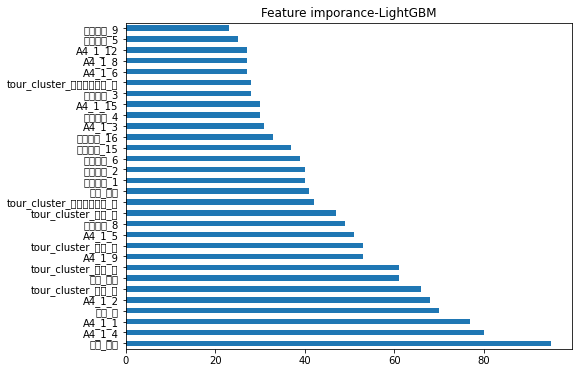

In [64]:
feat_imp = pd.Series(model.feature_importances_, index = f.columns)
feat_imp.nlargest(30).plot(kind = 'barh', figsize = (8,6))
plt.title('Feature imporance-LightGBM')